In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
from numpy import sin, cos, pi
from scipy.integrate import quad, dblquad

def triangle(x):
    if x < 1:
        return max(x, 0)
    else:
        return max(2 - x, 0)

def integrand(a, t, d):
    return (triangle(d * cos(a) * cos(t)) * max(0, 1 - d * cos(a) * sin(t))
               * max(0, 1 - d * sin(a)) * cos(a))

def compute_integral_for_d_space(d_space):
    p = []
    for d in d_space:
        I = dblquad(lambda a, t: integrand(a, t, d), 0, pi/2, lambda t: 0, lambda t: pi/2)
        p.append(I)
    return p

$$
P = 3 \frac{2}{\pi}\int_0^{\frac{\pi}{2}}\int_0^{\frac{\pi}{2}}(D\cos(\alpha)\cos(\theta))^*(1 - D\cos(\alpha)\sin(\theta))^+(1 - D\sin(\alpha))^+ d\theta \cos(\alpha) d\alpha
$$
Where
$$
(x)^* = 
\begin{cases}
  x^+ &\quad\text{if x}\le{1}\\
  (2-x)^+ &\quad\text{if x > 1}\\
\end{cases}
$$
and
$$
(x)^+ = \max(x, 0)
$$

In [2]:
d_space = np.linspace(0, np.sqrt(6))
p = compute_integral_for_d_space(d_space)

/usr/local/lib/python3.8/site-packages/scipy/integrate/_quadpack_py.py:1225: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


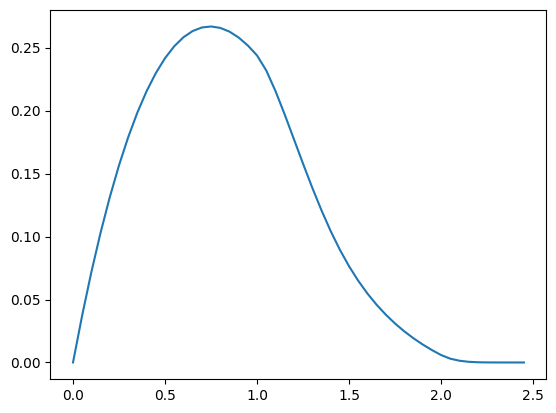

In [3]:
plt.plot(d_space, [pi[0] for pi in p])

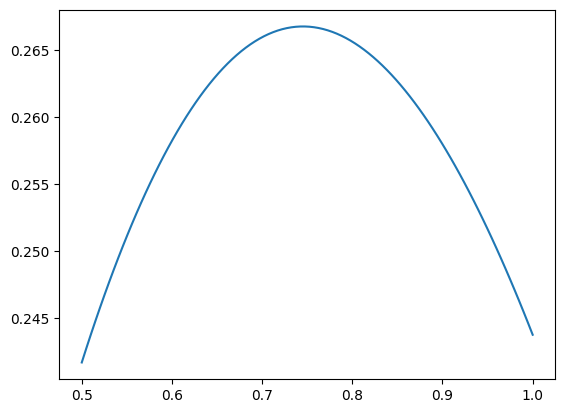

best d is 0.7474747474747475, with p = (0.2667897911467712, 4.4398830714454244e-15), 3 * 2/pi * p = 0.5095309683295561
-0.24747474747474751 3.429501855871607e-15 4.4398830714454244e-15


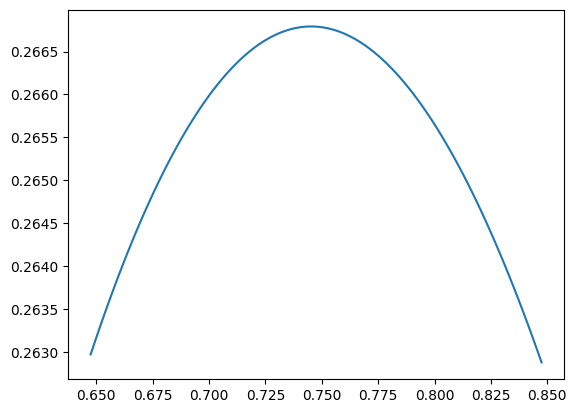

best d is 0.7444444444444445, with p = (0.2667914379640538, 4.430257063739955e-15), 3 * 2/pi * p = 0.5095341135188869
-0.09696969696969693 4.086290625115391e-15 4.430257063739955e-15


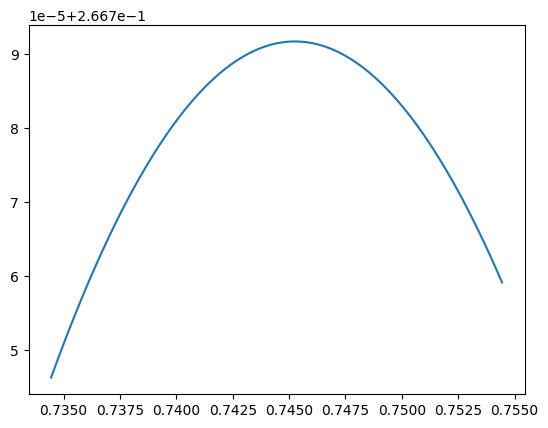

best d is 0.7453535353535353, with p = (0.26679169021446963, 4.433152010268837e-15), 3 * 2/pi * p = 0.5095345952816939
-0.010909090909090868 4.398008479889695e-15 4.433152010268837e-15


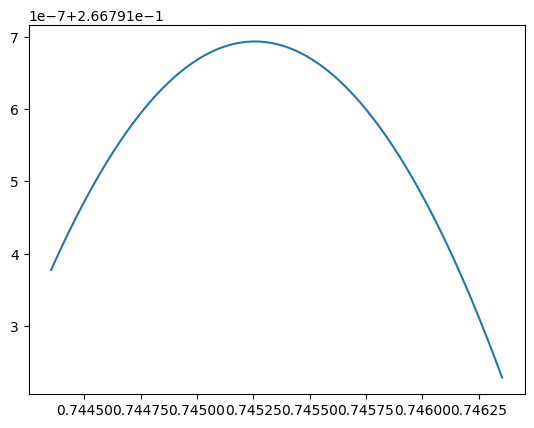

best d is 0.7452626262626262, with p = (0.26679169379568274, 4.4328627911801725e-15), 3 * 2/pi * p = 0.5095346021213071
-0.0009090909090908594 4.429967232285568e-15 4.4328627911801725e-15


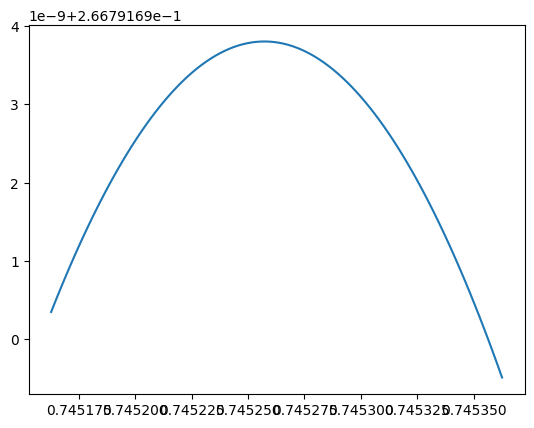

best d is 0.7452575757575757, with p = (0.2667916938069932, 4.432846721657513e-15), 3 * 2/pi * p = 0.5095346021429084
-9.494949494948113e-05 4.4325445794546194e-15 4.432846721657513e-15


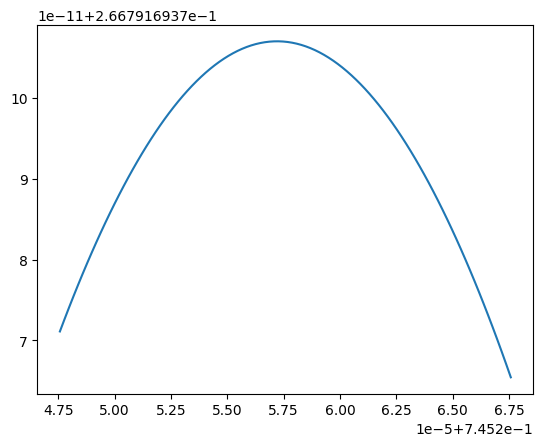

best d is 0.7452572727272726, with p = (0.2667916938070437, 4.432845757480142e-15), 3 * 2/pi * p = 0.5095346021430048
-9.69696969688183e-06 4.4328149034450576e-15 4.432845757480142e-15


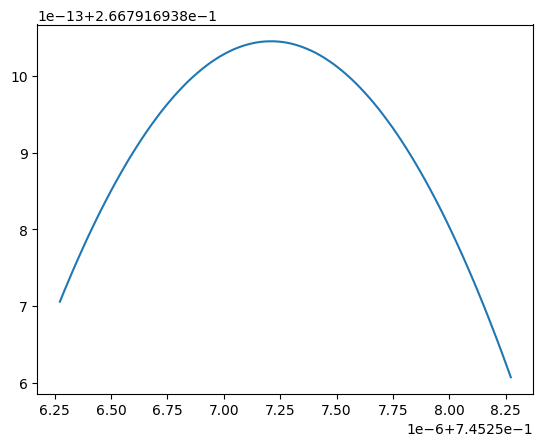

best d is 0.7452572020202018, with p = (0.2667916938070452, 4.432845532505326e-15), 3 * 2/pi * p = 0.5095346021430077
-9.292929292747942e-07 4.432842575689995e-15 4.432845532505326e-15


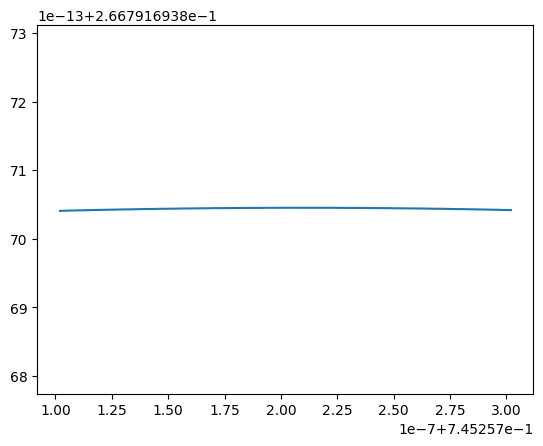

best d is 0.7452572050505049, with p = (0.2667916938070453, 4.4328455421471045e-15), 3 * 2/pi * p = 0.5095346021430079
-1.0303030295588655e-07 4.432845214326592e-15 4.4328455421471045e-15


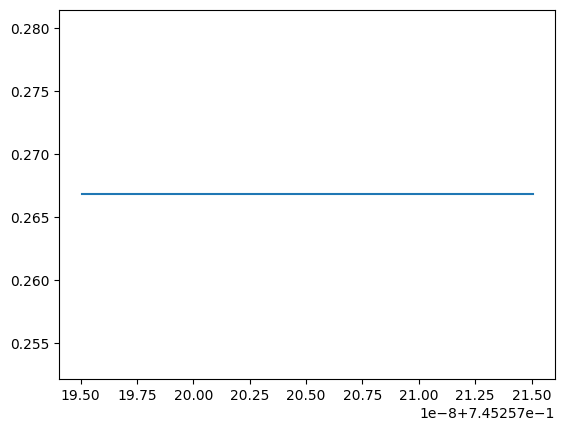

best d is 0.7452572095959594, with p = (0.2667916938070453, 4.432845556609772e-15), 3 * 2/pi * p = 0.5095346021430079
-1.4545454618541953e-08 4.4328455103292345e-15 4.432845556609772e-15


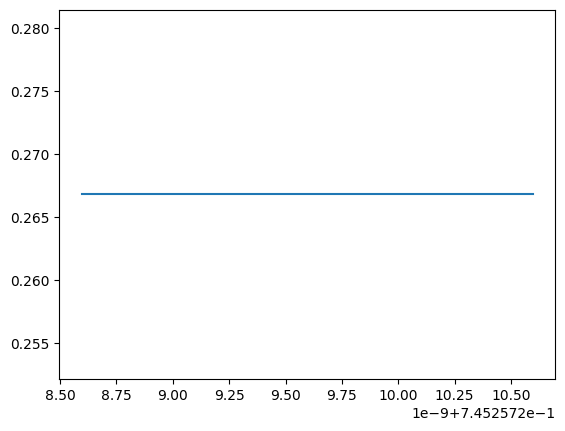

best d is 0.7452572086161615, with p = (0.2667916938070453, 4.432845553492264e-15), 3 * 2/pi * p = 0.5095346021430079
-2.02020622452892e-11 4.432845553427985e-15 4.432845553492264e-15


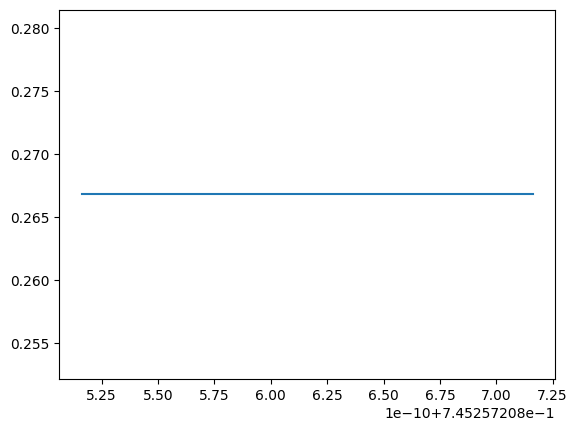

best d is 0.7452572085222221, with p = (0.2667916938070453, 4.432845553193369e-15), 3 * 2/pi * p = 0.5095346021430079
-6.060596469126267e-12 4.432845553174085e-15 4.432845553193369e-15


In [5]:
start = 0.5
end = 1
n = 100
for i in range(11):
    d_space = np.linspace(start, end, n)
    p = compute_integral_for_d_space(d_space)
    best = n//2
    for j in range(len(p)):
        if p[j][0] > p[best][0]:
            best = j
    start = d_space[best] - 1/(10**(i+1))
    end = d_space[best] + 1/(10**(i+1))
    plt.plot(d_space, [pi[0] for pi in p])
    plt.show()
    print(f"best d is {d_space[best]}, with p = {p[best]}, 3 * 2/pi * p = {(6/pi) * p[best][0]}")
    print(d_space[0] - d_space[best], p[0][1], p[best][1])

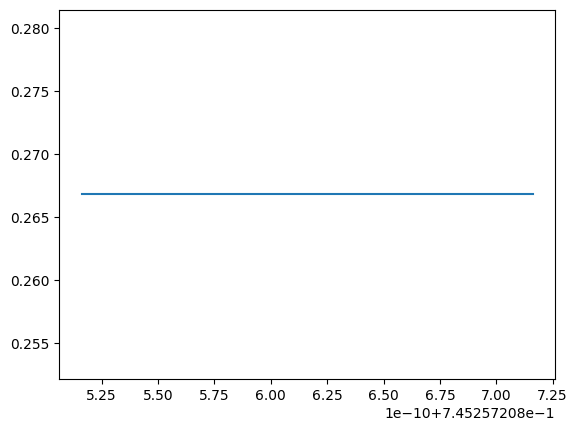

In [6]:
plt.plot(d_space, [pi[0] for pi in p])

In [9]:
import matplotlib.pyplot as plt
from mpmath import *

def triangle(x):
    if x < mpf("1"):
        return max(x, mpf("0"))
    else:
        return max(mpf("2") - x, mpf("0"))

def integrand(a, t, d):
    return (triangle(d * cos(a) * cos(t)) * max(mpf("0"), mpf("1") - d * cos(a) * sin(t)) 
            * max(mpf("0"), mpf("1") - d * sin(a)) * cos(a))

def compute_integral_for_d_space(d_space):
    p = []
    for d in d_space:
        I = quad(lambda a, t: integrand(a, t, d), [mpf("0"), pi/mpf("2")], [mpf("0"), pi/mpf("2")])
        p.append(I)
    return p

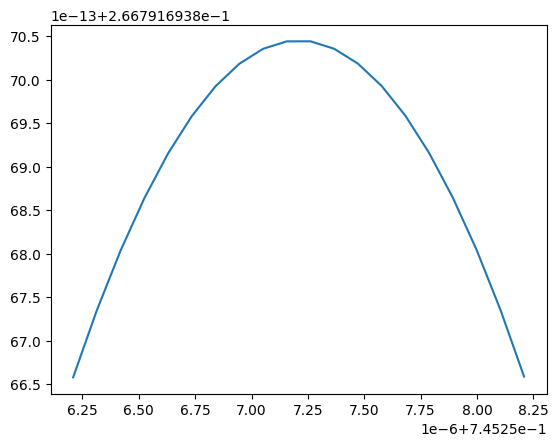

best d is 0.74525726115380104736842105, with p = 0.26679169380704421171390571. 3 * 2/pi * p = 0.5095346021430058415586498
i = 6
p:
0.26679169380665762768106622
0.26679169380673489837236796
0.2667916938068035885528886
0.26679169380686369822350291
0.26679169380691522738508564
0.26679169380695817603851156
0.26679169380699254418465543
0.26679169380701833182439202
0.26679169380703553895859609
0.26679169380704416558814239
0.26679169380704421171390571
0.26679169380703567733676079
0.2667916938070185624575824
0.2667916938069928670772453
0.26679169380695859119662426
0.26679169380691573481659404
0.2667916938068642979380294
0.26679169380680428056180511
0.26679169380673568268879593
0.26679169380665850431987662
d:
0.7452562085222221
0.7452563137853799947368421
0.74525641904853788947368421
0.74525652431169578421052632
0.74525662957485367894736842
0.74525673483801157368421053
0.74525684010116946842105263
0.74525694536432736315789474
0.74525705062748525789473684
0.74525715589064315263157895
0.745257261

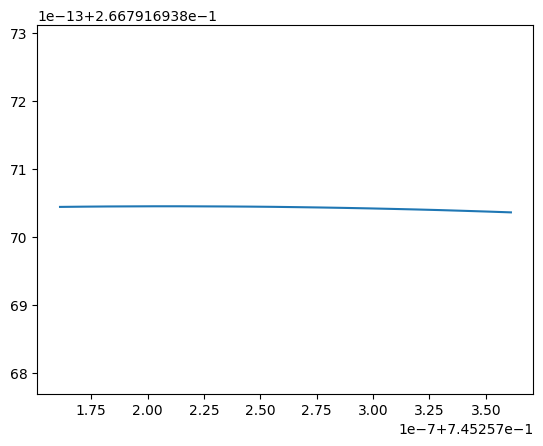

best d is 0.74525721378537999473684211, with p = 0.26679169380704525279459943. 3 * 2/pi * p = 0.50953460214300782987631256
i = 7
p:
0.26679169380704437168138813
0.26679169380704471951410168
0.26679169380704498154177871
0.26679169380704515776442009
0.26679169380704524818202671
0.26679169380704525279459943
0.26679169380704517160213913
0.2667916938070450046046467
0.26679169380704475180212299
0.26679169380704441319456888
0.26679169380704398878198526
0.26679169380704347856437299
0.26679169380704288254173295
0.26679169380704220071406602
0.26679169380704143308137306
0.26679169380704057964365496
0.26679169380703964040091259
0.26679169380703861535314682
0.26679169380703750450035853
0.2667916938070363078425486
d:
0.74525716115380104736842105
0.74525717168011683684210526
0.74525718220643262631578947
0.74525719273274841578947368
0.74525720325906420526315789
0.74525721378537999473684211
0.74525722431169578421052632
0.74525723483801157368421053
0.74525724536432736315789474
0.745257255890643152631578

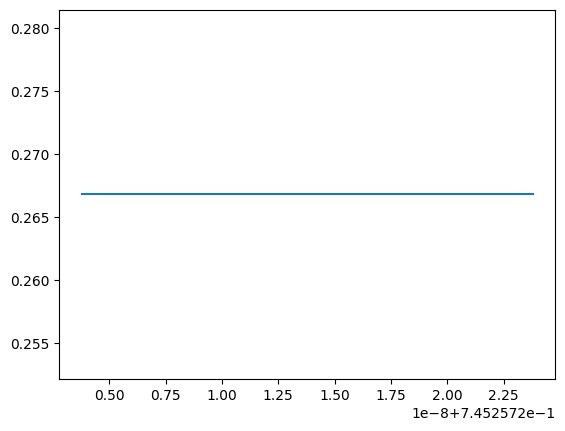

best d is 0.74525720904853788947368421, with p = 0.26679169380704526133731459. 3 * 2/pi * p = 0.50953460214300784619169671
i = 8
p:
0.26679169380704525045052489
0.26679169380704525434398351
0.26679169380704525737939178
0.26679169380704525955674972
0.26679169380704526087605733
0.26679169380704526133731459
0.26679169380704526094052153
0.26679169380704525968567813
0.2667916938070452575727844
0.26679169380704525460184034
0.26679169380704525077284594
0.26679169380704524608580122
0.26679169380704524054070617
0.26679169380704523413756079
0.26679169380704522687636508
0.26679169380704521875711905
0.26679169380704520977982269
0.26679169380704519994447601
0.266791693807045189251079
0.26679169380704517769963167
d:
0.74525720378537999473684211
0.74525720483801157368421053
0.74525720589064315263157895
0.74525720694327473157894737
0.74525720799590631052631579
0.74525720904853788947368421
0.74525721010116946842105263
0.74525721115380104736842105
0.74525721220643262631578947
0.7452572132590642052631578

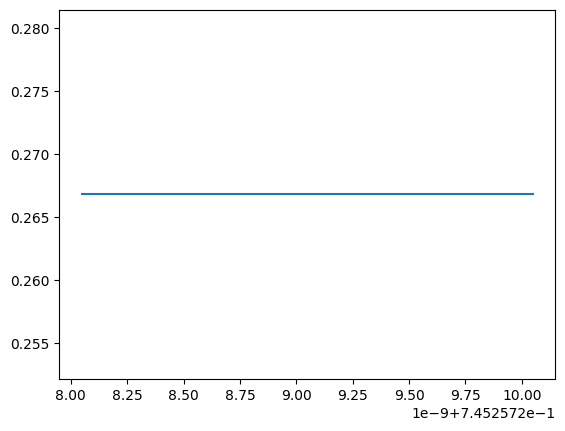

best d is 0.74525720910116946842105263, with p = 0.26679169380704526133785364. 3 * 2/pi * p = 0.50953460214300784619272621
i = 9
p:
0.26679169380704526091949888
0.26679169380704526099994662
0.26679169380704526107181386
0.2667916938070452611351006
0.26679169380704526118980683
0.26679169380704526123593255
0.26679169380704526127347778
0.2667916938070452613024425
0.26679169380704526132282671
0.26679169380704526133463043
0.26679169380704526133785364
0.26679169380704526133249634
0.26679169380704526131855855
0.26679169380704526129604025
0.26679169380704526126494144
0.26679169380704526122526214
0.26679169380704526117700233
0.26679169380704526112016201
0.2667916938070452610547412
0.26679169380704526098073988
d:
0.74525720804853788947368421
0.74525720815380104736842105
0.74525720825906420526315789
0.74525720836432736315789474
0.74525720846959052105263158
0.74525720857485367894736842
0.74525720868011683684210526
0.74525720878537999473684211
0.74525720889064315263157895
0.7452572089959063105263157

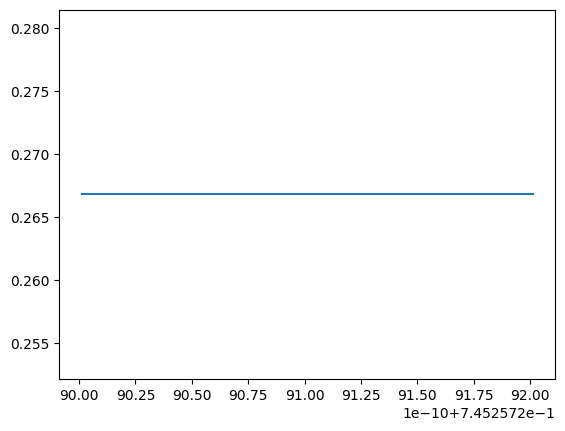

best d is 0.74525720908537999473684211, with p = 0.26679169380704526133791716. 3 * 2/pi * p = 0.50953460214300784619284753
i = 10
p:
0.26679169380704526133499537
0.26679169380704526133566091
0.26679169380704526133624065
0.26679169380704526133673458
0.26679169380704526133714271
0.26679169380704526133746503
0.26679169380704526133770154
0.26679169380704526133785226
0.26679169380704526133791716
0.26679169380704526133789626
0.26679169380704526133778956
0.26679169380704526133759705
0.26679169380704526133731874
0.26679169380704526133695462
0.26679169380704526133650469
0.26679169380704526133596896
0.26679169380704526133534743
0.26679169380704526133464009
0.26679169380704526133384694
0.26679169380704526133296799
d:
0.74525720900116946842105263
0.74525720901169578421052632
0.7452572090222221
0.74525720903274841578947368
0.74525720904327473157894737
0.74525720905380104736842105
0.74525720906432736315789474
0.74525720907485367894736842
0.74525720908537999473684211
0.74525720909590631052631579
0.74

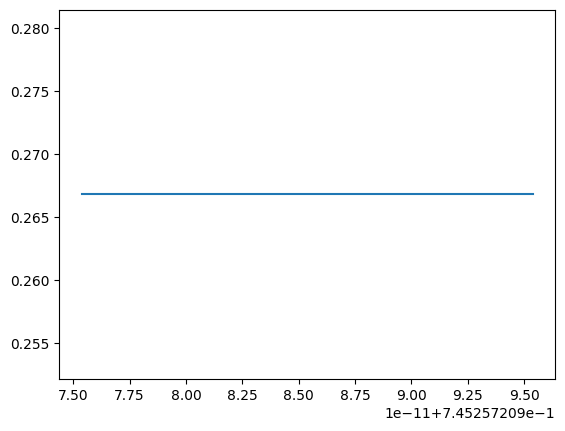

best d is 0.74525720908801157368421053, with p = 0.26679169380704526133791998. 3 * 2/pi * p = 0.50953460214300784619285292
i = 11
p:
0.26679169380704526133785754
0.26679169380704526133786746
0.26679169380704526133787653
0.26679169380704526133788473
0.26679169380704526133789208
0.26679169380704526133789857
0.26679169380704526133790421
0.26679169380704526133790898
0.2667916938070452613379129
0.26679169380704526133791595
0.26679169380704526133791815
0.2667916938070452613379195
0.26679169380704526133791998
0.26679169380704526133791961
0.26679169380704526133791838
0.26679169380704526133791629
0.26679169380704526133791334
0.26679169380704526133790953
0.26679169380704526133790487
0.26679169380704526133789935
d:
0.74525720907537999473684211
0.74525720907643262631578947
0.74525720907748525789473684
0.74525720907853788947368421
0.74525720907959052105263158
0.74525720908064315263157895
0.74525720908169578421052632
0.74525720908274841578947368
0.74525720908380104736842105
0.74525720908485367894736

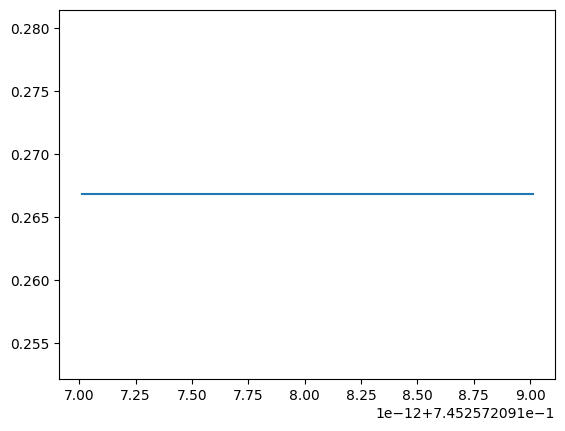

best d is 0.7452572090880642052631579, with p = 0.26679169380704526133791998. 3 * 2/pi * p = 0.50953460214300784619285292
i = 12
p:
0.26679169380704526133791954
0.26679169380704526133791962
0.2667916938070452613379197
0.26679169380704526133791976
0.26679169380704526133791982
0.26679169380704526133791987
0.26679169380704526133791991
0.26679169380704526133791994
0.26679169380704526133791996
0.26679169380704526133791998
0.26679169380704526133791998
0.26679169380704526133791998
0.26679169380704526133791997
0.26679169380704526133791995
0.26679169380704526133791992
0.26679169380704526133791988
0.26679169380704526133791984
0.26679169380704526133791978
0.26679169380704526133791972
0.26679169380704526133791965
d:
0.74525720908701157368421053
0.74525720908711683684210526
0.7452572090872221
0.74525720908732736315789474
0.74525720908743262631578947
0.74525720908753788947368421
0.74525720908764315263157895
0.74525720908774841578947368
0.74525720908785367894736842
0.74525720908795894210526316
0.7452

In [13]:
mp.dps = 26
guess = mpf("0.7452572085222221")
# guess = mpf("0.7391099542333334")
# start = mpf("0.5")
# end = mpf("1")
start = guess - mpf(f"1e-{6}")
end = guess + mpf(f"1e-{6}")
n = 20
# n = 100
# for i in range(11):
for i in range(6, 13):
    d_space = linspace(start, end, n)
    p = compute_integral_for_d_space(d_space)
    best = n//2
    for j in range(len(p)):
        if p[j] > p[best]:
            best = j
    start = d_space[best] - mpf(f"1e-{i+1}")
    end = d_space[best] + mpf(f"1e-{i+1}")
    plt.plot(d_space, p)
    plt.show()
    print(f"best d is {d_space[best]}, with p = {p[best]}. 3 * 2/pi * p = {mpf(6)/pi * p[best]}")
    print(f"i = {i}")
    print("p:")
    print("\n".join([str(x) for x in p]))
    print("d:")
    print("\n".join([str(x) for x in d_space]))
    print(d_space[0] - d_space[best], p[0], p[best])

print(f"answer = \"{nstr(d_space[best], 10)},{nstr(mpf(6)/pi * p[best], 10)}\"")

In [ ]:
answer = "0.7452572091,0.5095346021"

In [ ]:
wrong_answer3 = "0.7391099590,0.5114918209"
wrong_answer2 = "0.7391099590,0.3256258066"
wrong_answer = "0.6956061640,0.3887750015"